# Trabalho de LUI

Trabalho de LUI feito por:

Luiz Fernando da Costa Castro - luizfernandoccastro@gmail.com

OBJETIVO:

O objetivo do trabalho foi utilizar a API de book reviews do NYT, que contém os reviews de livros da lista de mais vendidos, e extrair informações dessa lista, realizando todos os passos e procedimentos solicitados pelo trabalho.

Após essa análise, utilizamos o API de filmes do TMDB para pegar informações dos filmes, especialmente relacionado a popularidade e nota média de acordo com votação. Realizamos nessa API os mesmos procedimentos realizados na do NYT.

A segunda parte do trabalho foi feita para que pudéssemos realizar a terceira parte: uma comparação entre a base de dados do NYT com a de filmes. Nossa intenção foi de buscar livros adaptados para o cinema e verificar suas notas e popularidade. Buscamos entender se haveria alguma predisposição a notas maiores ou popularidade maior devido a trazer uma fanbase de leitores. Além disso, com base no resultado, poderíamos tirar conclusões sobre a qualidade média das adaptações, uma vez que se um livro está na lista de mais vendidos, supõem-se que ele tem uma história boa ou comercializável o suficiente para constar entre os mais vendidos. Logo, uma adaptação para o cinema também deveria ter algum sucesso, seja de crítica ou de popularidade.

Infelizmente não foi possível fazer uma comparação com a receita gerada, pois essa informação não está disponível na versão gratuita do TMDB e a versão do IMDB está bem defasada e considera apenas a bilheteria doméstica dos EUA.

## Importação de Bibliotecas

In [2]:
%pip install requests


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# NYT API

## Extração de dados da API

uma conta foi criada no API do NYT para que pudéssemos gerar uma chave e importar os dados da API

In [4]:
api_key = 'msPM3aEzqC1z1wahctzSSGhldxaFceIT'
url = 'https://api.nytimes.com/svc/books/v3/lists/full-overview.json'
params = {'api-key': api_key}

response = requests.get(url, params=params)
data = response.json()

print(data)

{'status': 'OK', 'copyright': 'Copyright (c) 2024 The New York Times Company.  All Rights Reserved.', 'num_results': 230, 'results': {'bestsellers_date': '2024-08-10', 'published_date': '2024-08-25', 'published_date_description': 'latest', 'previous_published_date': '2024-08-18', 'next_published_date': '', 'lists': [{'list_id': 704, 'list_name': 'Combined Print and E-Book Fiction', 'list_name_encoded': 'combined-print-and-e-book-fiction', 'display_name': 'Combined Print & E-Book Fiction', 'updated': 'WEEKLY', 'list_image': None, 'list_image_width': None, 'list_image_height': None, 'books': [{'age_group': '', 'amazon_product_url': 'http://www.amazon.com/Ends-Us-Novel-Colleen-Hoover-ebook/dp/B0176M3U10?tag=thenewyorktim-20', 'article_chapter_link': '', 'author': 'Colleen Hoover', 'book_image': 'https://storage.googleapis.com/du-prd/books/images/9781501110375.jpg', 'book_image_width': 319, 'book_image_height': 495, 'book_review_link': '', 'book_uri': 'nyt://book/e2a3545e-e9cb-5828-9d97-50

## Criação de DataFrame

tendo a conexão com a API corretamente, vamos criar um data frame apenas com as informações dos livros

In [5]:
books_list = data['results']['lists']
#criando uma lista com a parte de results

In [6]:
all_books = []
for i in books_list:
    all_books.extend(i['books'])
# a partir de results, pegamos os dados dos livros

In [7]:
df_books = pd.DataFrame(all_books)
# vamos agora criar um dataframe apenas com informações dos livros

In [8]:
df_books.head()

,age_group,amazon_product_url,article_chapter_link,author,book_image,book_image_width,book_image_height,book_review_link,book_uri,btrn,...,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,updated_date,weeks_on_list,buy_links
0,,http://www.amazon.com/Ends-Us-Novel-Colleen-Ho...,,Colleen Hoover,https://storage.googleapis.com/du-prd/books/im...,319.0,495.0,,nyt://book/e2a3545e-e9cb-5828-9d97-50a798a0e4f6,2020673285,...,1501110365,9781501110368,Atria,1,1,,IT ENDS WITH US,2024-08-14 22:25:14,133,"[{'name': 'Amazon', 'url': 'http://www.amazon...."
1,,https://www.amazon.com/dp/1649377177?tag=thene...,,Hannah Nicole Maehrer,https://storage.googleapis.com/du-prd/books/im...,309.0,500.0,,nyt://book/f183efdb-fc83-5eaf-ae98-9464394f148f,232932897,...,1649377177,9781649377173,Red Tower,2,0,,APPRENTICE TO THE VILLAIN,2024-08-14 22:25:14,1,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
2,,https://www.amazon.com/dp/1982182237?tag=thene...,,Brad Thor,https://storage.googleapis.com/du-prd/books/im...,327.0,500.0,,nyt://book/a9ec7375-c647-5299-b720-7e0a4c2f7632,240393069,...,1982182261,9781982182267,Atria/Emily Bestler,3,0,,SHADOW OF DOUBT,2024-08-14 22:25:14,1,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
3,,https://www.amazon.com/dp/1668001225?tag=thene...,,Colleen Hoover,https://storage.googleapis.com/du-prd/books/im...,322.0,500.0,,nyt://book/3aa85e47-4df9-53ef-9957-a77753d3502c,221771841,...,1668001225,9781668001226,Atria,4,7,,IT STARTS WITH US,2024-08-14 22:25:14,49,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
4,,https://www.amazon.com/dp/1250178630?tag=thene...,,Kristin Hannah,https://storage.googleapis.com/du-prd/books/im...,333.0,500.0,,nyt://book/9ce735af-71cf-5ff3-a367-43ee07e3fdd7,226376628,...,1250178630,9781250178633,St. Martin's,5,2,,THE WOMEN,2024-08-14 22:25:15,27,"[{'name': 'Amazon', 'url': 'https://www.amazon..."


In [9]:
df_books.tail()

,age_group,amazon_product_url,article_chapter_link,author,book_image,book_image_width,book_image_height,book_review_link,book_uri,btrn,...,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,updated_date,weeks_on_list,buy_links
225,,https://www.amazon.com/dp/1728297087?tag=thene...,,Tillie Cole,https://storage.googleapis.com/du-prd/books/im...,333.0,500.0,,nyt://book/7c1ebba7-c1a4-5845-b211-b3c8d4eebb1c,229907211,...,1728297087,9781728297088,Bloom,6,0,,A THOUSAND BOY KISSES,2024-08-07 23:00:10,0,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
226,,https://www.amazon.com/dp/1419760874?tag=thene...,,Alex Aster,https://storage.googleapis.com/du-prd/books/im...,333.0,500.0,,nyt://book/072a11c1-910e-5bfb-8bcb-b8850052e9c1,225161587,...,1419760874,9781419760877,Amulet,7,0,,LIGHTLARK,2024-08-07 23:00:10,0,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
227,,http://www.amazon.com/Girl-Pieces-Kathleen-Gla...,,Kathleen Glasgow,https://storage.googleapis.com/du-prd/books/im...,328.0,495.0,,nyt://book/4c61a5f1-f0f8-5184-978c-c7056c96a644,2020701235,...,1101934743,9781101934746,Ember,8,0,,GIRL IN PIECES,2024-08-07 23:00:10,0,"[{'name': 'Amazon', 'url': 'http://www.amazon...."
228,,https://www.amazon.com/dp/1728210291?tag=thene...,,K.L. Walther,https://storage.googleapis.com/du-prd/books/im...,333.0,500.0,,nyt://book/14805c1f-c503-550e-912c-f90aa1507d04,220376223,...,1728210291,9781728210292,Sourcebooks Fire,9,0,,THE SUMMER OF BROKEN RULES,2024-08-07 23:00:10,0,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
229,,http://www.amazon.com/The-Book-Thief-Markus-Zu...,,Markus Zusak,https://storage.googleapis.com/du-prd/books/im...,321.0,495.0,https://www.nytimes.com/2006/03/27/books/27mas...,nyt://book/535c6937-87ea-5803-a820-cc3cb3114056,1672529,...,0375842209,9780375842207,Knopf,10,0,https://www.nytimes.com/2006/05/14/books/revie...,THE BOOK THIEF,2024-08-07 23:00:10,0,"[{'name': 'Amazon', 'url': 'http://www.amazon...."


In [10]:
df_books.columns

Index(['age_group', 'amazon_product_url', 'article_chapter_link', 'author',
       'book_image', 'book_image_width', 'book_image_height',
       'book_review_link', 'book_uri', 'btrn', 'contributor',
       'contributor_note', 'created_date', 'description', 'first_chapter_link',
       'price', 'primary_isbn10', 'primary_isbn13', 'publisher', 'rank',
       'rank_last_week', 'sunday_review_link', 'title', 'updated_date',
       'weeks_on_list', 'buy_links'],
      dtype='object')

In [11]:
df_books = df_books.replace(r'^\s*$', np.nan, regex=True)
#muitos espaços estão como blank. Com a fórmula acima, substituímos os blanks ou strings que tenham apenas espaço 
#para NaN, assim podemos realizar mais operações sem que o blank apareça como sendo um valor


C:\Users\LuizFernandoDaCostaC\AppData\Local\Temp\ipykernel_5256\2795593090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_books = df_books.replace(r'^\s*$', np.nan, regex=True)


In [12]:
df_books.isna().sum()
#verificando a quantidade de NaN em cada coluna para decidir quais colunas manter

age_group               190
amazon_product_url        0
article_chapter_link    230
author                    0
book_image                2
book_image_width          2
book_image_height         2
book_review_link        222
book_uri                  0
btrn                      0
contributor               0
contributor_note        211
created_date              0
description              40
first_chapter_link      228
price                     0
primary_isbn10           17
primary_isbn13            0
publisher                 0
rank                      0
rank_last_week            0
sunday_review_link      223
title                     0
updated_date              0
weeks_on_list             0
buy_links                 0
dtype: int64

In [13]:
columns_to_keep = ['author',
       'description',
       'publisher', 'rank',
       'rank_last_week', 'title', 'updated_date',
       'weeks_on_list']
#há bem mais colunas a retirar do que manter, por isso foi criada uma lista com todas as colunas a serem mantidas
#as colunas retiradas seguiram dois critérios: muitos NaN ou colunas com informações que não nos interessavam

In [14]:
df_books = df_books[columns_to_keep]
#criação de um novo dataframe apenas com colunas a serem mantidas

In [15]:
df_books.columns
#verificando todas as colunas do novo df

Index(['author', 'description', 'publisher', 'rank', 'rank_last_week', 'title',
       'updated_date', 'weeks_on_list'],
      dtype='object')

In [16]:
df_books.head()

,author,description,publisher,rank,rank_last_week,title,updated_date,weeks_on_list
0,Colleen Hoover,A battered wife raised in a violent home attem...,Atria,1,1,IT ENDS WITH US,2024-08-14 22:25:14,133
1,Hannah Nicole Maehrer,The second book in the Assistant and the Villa...,Red Tower,2,0,APPRENTICE TO THE VILLAIN,2024-08-14 22:25:14,1
2,Brad Thor,The 23rd book in the Scot Harvath series. A me...,Atria/Emily Bestler,3,0,SHADOW OF DOUBT,2024-08-14 22:25:14,1
3,Colleen Hoover,"In the sequel to “It Ends With Us,” Lily deals...",Atria,4,7,IT STARTS WITH US,2024-08-14 22:25:14,49
4,Kristin Hannah,"In 1965, a nursing student follows her brother...",St. Martin's,5,2,THE WOMEN,2024-08-14 22:25:15,27


In [17]:
new_order = ['title', 'author', 'publisher', 'description', 
       'rank', 'rank_last_week', 'weeks_on_list', 'updated_date']
#alterando a ordem das colunas para privilegiar o nome do livro e autores

In [18]:
df_books = df_books[new_order]

In [19]:
df_books.head()

,title,author,publisher,description,rank,rank_last_week,weeks_on_list,updated_date
0,IT ENDS WITH US,Colleen Hoover,Atria,A battered wife raised in a violent home attem...,1,1,133,2024-08-14 22:25:14
1,APPRENTICE TO THE VILLAIN,Hannah Nicole Maehrer,Red Tower,The second book in the Assistant and the Villa...,2,0,1,2024-08-14 22:25:14
2,SHADOW OF DOUBT,Brad Thor,Atria/Emily Bestler,The 23rd book in the Scot Harvath series. A me...,3,0,1,2024-08-14 22:25:14
3,IT STARTS WITH US,Colleen Hoover,Atria,"In the sequel to “It Ends With Us,” Lily deals...",4,7,49,2024-08-14 22:25:14
4,THE WOMEN,Kristin Hannah,St. Martin's,"In 1965, a nursing student follows her brother...",5,2,27,2024-08-14 22:25:15


## Operação de ordenação

a operação de ordenação foi feita por ordem alfabética do nome do autor dos livros e depois outra ordenação foi feita com a quantidade de semanas na lista

a primeira operação teve como base a ordem alfabética, já a segunda teve como base ordenar historicamente quais são os livros que apareceram e permaneceram mais tempo na lista de mais vendidos do NYT

In [20]:
df_ordenado_autor = df_books.sort_values(by='author')

In [21]:
df_ordenado_autor.head()

,title,author,publisher,description,rank,rank_last_week,weeks_on_list,updated_date
191,THE BAD GUYS,Aaron Blabey,Scholastic,Tough animals in suits take on some real villa...,12,0,0,2024-08-07 23:00:03
181,THE BAD GUYS IN THE SERPENT AND THE BEAST,Aaron Blabey,Scholastic,The 19th book in the Bad Guys series.,2,0,0,2024-08-07 23:00:03
70,JUST FOR THE SUMMER,Ab Jimenez,Forever,"Justin and Emma, whose exes find soulmates aft...",11,8,19,2024-08-14 22:25:11
8,JUST FOR THE SUMMER,Ab Jimenez,Forever,"Justin and Emma, whose exes find soulmates aft...",9,15,17,2024-08-14 22:25:15
179,HIDDEN POTENTIAL,Adam Grant,Viking,NaN,10,0,0,2024-08-07 23:00:08


In [22]:
df_ordenado_weeks = df_books.sort_values(by='weeks_on_list', ascending = False)
df_ordenado_weeks.head()

,title,author,publisher,description,rank,rank_last_week,weeks_on_list,updated_date
125,DIARY OF A WIMPY KID,and Jeff Kinney,Amulet,The travails and challenges of adolescence. (A...,6,5,804,2024-08-14 22:25:09
124,HARRY POTTER,J.K. Rowling,Scholastic,A wizard hones his conjuring skills in the ser...,5,7,803,2024-08-14 22:25:09
126,PERCY JACKSON & THE OLYMPIANS,Rick Riordan,Disney-Hyperion,A boy battles mythological monsters. (Ages 9 t...,7,4,737,2024-08-14 22:25:09
85,THE GLASS CASTLE,Jeannette Walls,Scribner,The author recalls how she and her siblings we...,11,15,498,2024-08-14 22:25:13
100,WONDER,R.J. Palacio,Knopf,A boy with a facial deformity starts school. (...,1,2,455,2024-08-14 22:25:10


## Operação de filtragem

para a filtragem, primeiro selecionamos apenas os livros que estão atualmente nas 10 primeiras posições do ranking de mais vendidos, depois selecionamos os livros que estão há mais de 10 anos (520 semanas) na lista de mais vendidos

In [23]:
df_filtrado_rank = df_books.loc[df_books['rank'] < 11]
df_filtrado_rank.head(10)

,title,author,publisher,description,rank,rank_last_week,weeks_on_list,updated_date
0,IT ENDS WITH US,Colleen Hoover,Atria,A battered wife raised in a violent home attem...,1,1,133,2024-08-14 22:25:14
1,APPRENTICE TO THE VILLAIN,Hannah Nicole Maehrer,Red Tower,The second book in the Assistant and the Villa...,2,0,1,2024-08-14 22:25:14
2,SHADOW OF DOUBT,Brad Thor,Atria/Emily Bestler,The 23rd book in the Scot Harvath series. A me...,3,0,1,2024-08-14 22:25:14
3,IT STARTS WITH US,Colleen Hoover,Atria,"In the sequel to “It Ends With Us,” Lily deals...",4,7,49,2024-08-14 22:25:14
4,THE WOMEN,Kristin Hannah,St. Martin's,"In 1965, a nursing student follows her brother...",5,2,27,2024-08-14 22:25:15
5,A COURT OF THORNS AND ROSES,Sarah J. Maas,Bloomsbury,"After killing a wolf in the woods, Feyre is ta...",6,5,18,2024-08-14 22:25:15
6,THE HOUSEMAID,Freida McFadden,Grand Central,Troubles surface when a woman looking to make ...,7,4,57,2024-08-14 22:25:15
7,THE PAIRING,Casey McQuiston,St. Martin's Griffin,"Four years after they broke up, Theo and Kit r...",8,0,1,2024-08-14 22:25:15
8,JUST FOR THE SUMMER,Ab Jimenez,Forever,"Justin and Emma, whose exes find soulmates aft...",9,15,17,2024-08-14 22:25:15
9,THE HOUSEMAID IS WATCHING,Freida McFadden,Poisoned Pen,The third book in the Housemaid series. Danger...,10,8,9,2024-08-14 22:25:15


In [24]:
df_filtrado_weeks = df_books.loc[df_books['weeks_on_list'] > 520]
df_filtrado_weeks.head(10)

,title,author,publisher,description,rank,rank_last_week,weeks_on_list,updated_date
124,HARRY POTTER,J.K. Rowling,Scholastic,A wizard hones his conjuring skills in the ser...,5,7,803,2024-08-14 22:25:09
125,DIARY OF A WIMPY KID,and Jeff Kinney,Amulet,The travails and challenges of adolescence. (A...,6,5,804,2024-08-14 22:25:09
126,PERCY JACKSON & THE OLYMPIANS,Rick Riordan,Disney-Hyperion,A boy battles mythological monsters. (Ages 9 t...,7,4,737,2024-08-14 22:25:09


## Operação de pivotamento

não há muitas possibilidades de pivotamento com o df acima, o mais plausível foi realizar uma contagem de quantos livros por editora cada autor publicou

In [25]:
df_books['publisher'].value_counts()
#a contagem de quantos livros foram publicados no total de cada editora

publisher
Scholastic                15
Little, Brown              9
Penguin Audio              8
Harper                     6
Grand Central              6
                          ..
Love Inspired Suspense     1
Nancy Paulsen              1
Square Fish                1
HarperCollins              1
Ember                      1
Name: count, Length: 97, dtype: int64

In [26]:
df_pivotado = df_books.pivot_table(index='author', columns='publisher', values='title', aggfunc='count')
df_pivotado.head()
#criando um df pivoteado com as condições descritas acima

publisher,AUWA,Amulet,Atheneum,Atria,Atria/Emily Bestler,Avery,Back Bay,Berkley,Blackstone Audio,Bloom,...,Square Fish,St. Martin's,St. Martin's Griffin,Tundra,VIZ Media,Viking,Vintage,WaterBrook,Wednesday,Workman
author,,,,,,,,,,,,,,,,,,,,,
Aaron Blabey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ab Jimenez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Grant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Adam Rubin.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alan Gratz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
publisher_counts = df_books['publisher'].value_counts()
publishers_to_keep = publisher_counts[publisher_counts > 4].index
df_filtrado_publisher = df_books[df_books['publisher'].isin(publishers_to_keep)]
#devido ao tamanho do df, o primeiro approach foi verificar apenas os publishers com mais livros, utilizando a filtragem 
#Dessa forma, foi escolhido arbitrariamente o número de 5 livros ou amis publicados no total

In [28]:
df_filtrado_publisher['publisher'].value_counts()

publisher
Scholastic                15
Little, Brown              9
Penguin Audio              8
Grand Central              6
Harper                     6
Bloomsbury                 5
Simon & Schuster           5
Random House               5
Penguin                    5
Simon & Schuster Audio     5
Random House Audio         5
Name: count, dtype: int64

In [29]:
df_pivotado = df_filtrado_publisher.pivot_table(index='author', columns='publisher', values='title', aggfunc='count')
df_pivotado
#o df gerado possui muita informação. 
#A curiosidade foi de verificar quantos autores possuem livros publicados em mais de uma editora

publisher,Bloomsbury,Grand Central,Harper,"Little, Brown",Penguin,Penguin Audio,Random House,Random House Audio,Scholastic,Simon & Schuster,Simon & Schuster Audio
author,,,,,,,,,,,
Aaron Blabey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Alan Gratz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Ann M. Martin.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Annie Jacobsen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anthony S. Fauci,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Ashley Elston,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Bessel van der Kolk,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
Brené Brown,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Charles Duhigg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [30]:
author_multiple = df_pivotado.count(axis=1)
author_multiple = author_multiple[author_multiple > 1]
author_multiple
print(author_multiple)
print('a quantidade de autores publicados em mais de uma editora é de ' + str(len(author_multiple)))
#utilizando as fórmulas acima, verificamos que apenas 3 autores, dentre os editores com 5 ou mais livros publicados
#publicaram por mais de uma editora

author
Bessel van der Kolk    2
Colleen Hoover         2
Kamala Harris          2
dtype: int64
a quantidade de autores publicados em mais de uma editora é de 3


In [31]:
df_pivotado = df_books.pivot_table(index='author', columns='publisher', values='title', aggfunc='count')
df_pivotado
#agora que conseguimos ver em um universo menor, repetimos a curiosidade anterior considerando o universo total de livros

publisher,AUWA,Amulet,Atheneum,Atria,Atria/Emily Bestler,Avery,Back Bay,Berkley,Blackstone Audio,Bloom,...,Square Fish,St. Martin's,St. Martin's Griffin,Tundra,VIZ Media,Viking,Vintage,WaterBrook,Wednesday,Workman
author,,,,,,,,,,,,,,,,,,,,,
Aaron Blabey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ab Jimenez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Grant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Adam Rubin.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alan Gratz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Walter Isaacson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whoopi Goldberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Will Guidara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
author_multiple = df_pivotado.count(axis=1)
author_multiple = author_multiple[author_multiple > 1]
print(author_multiple)
print('a quantidade de autores publicados em mais de uma editora é de ' + str(len(author_multiple)))

author
Annie Jacobsen                          2
Bessel van der Kolk                     2
Chris Whitaker                          2
Colleen Hoover                          3
David Grann                             2
Drew Daywalt.                           2
Erik Larson                             2
Freida McFadden                         3
J.D. Vance                              2
Jonathan Haidt                          2
Kamala Harris                           2
Kristin Hannah                          3
Liz Moore                               2
Maureen Callahan                        2
Michael Crichton and James Patterson    2
Peter Attia with Bill Gifford           2
Rebecca Yarros                          2
Sarah J. Maas                           2
Stephen King                            3
Tom O'Neill with Dan Piepenbring        2
dtype: int64
a quantidade de autores publicados em mais de uma editora é de 20


# TMDB API

## Extração de dados da API

In [33]:
TMDB_API_KEY = '3d19443e48966c3b1f151241e52cabbe'
base_url = "https://api.themoviedb.org/3/search/movie"


In [34]:
def movie_data(movie_titles):
    results = []
    
    for movie in movie_titles:
        url = f"{base_url}?api_key={TMDB_API_KEY}&query={movie}"
        response = requests.get(url)
        data = response.json()

        # Check if the movie was found
        if data['results']:
            movie_info = data['results'][0]  # Take the first result
            movie_details = {
                'title': movie_info.get('title').lower(),
                'original language': movie_info.get('original_language'),
                'release_date': movie_info.get('release_date'),
                'vote_average': movie_info.get('vote_average'),
                'Popularity': movie_info.get('popularity'),
                'Overview': movie_info.get('overview')
            }
            results.append(movie_details)
        else:
            results.append({'title': movie})
    
    return results

## Criação do dataframe

o objetivo do novo dataframe é pegar a base de dados do TMDB e utilizar a lista de livros do NYT para fazer uma
análise cruzada de todos os livros que viraram filmes

In [35]:
movies_info = []
for book in all_books:
    movie_title = book['title']
    movie_data_for_title = movie_data([movie_title])
    movies_info.extend(movie_data_for_title)

df_movies = pd.DataFrame(movies_info)
df_movies

,title,original language,release_date,vote_average,Popularity,Overview
0,it ends with us,en,2024-08-07,6.991,1755.443,Lily Bloom overcomes a traumatic childhood to ...
1,APPRENTICE TO THE VILLAIN,NaN,NaN,NaN,NaN,NaN
2,shadow of doubt,en,1998-04-09,4.459,5.360,An attorney uncovers a political conspiracy in...
3,republic: mustafa kemal pasha started to work ...,tr,1998-12-28,0.000,5.914,Mustafa Kemal Pasha started to work on the use...
4,the women,en,1939-09-01,7.100,11.054,A happily married woman lets her catty friends...
...,...,...,...,...,...,...
225,a thousand boy kisses,en,,0.000,1.151,Seventeen-year-old Rune Kristiansen returns fr...
226,LIGHTLARK,NaN,NaN,NaN,NaN,NaN
227,GIRL IN PIECES,NaN,NaN,NaN,NaN,NaN
228,THE SUMMER OF BROKEN RULES,NaN,NaN,NaN,NaN,NaN


In [36]:
is_duplicate = df_movies.duplicated(subset='title', keep='first')
#df_unique_titles = df_movies[~duplicate_titles]
df_unique_titles = df_movies[~is_duplicate]
#retirando valores duplicados do df do NYT
#no API do NYT havia títulos duplicados quando houve interrupção entre as semanas entre os mais vendidos,
#editora diferente ou qq informação diferente na coluna
#como o objetivo é apenas realizar uma comparação entre dfs, não precisamos da informação duplicada, uma vez que
#a informação da API do TMDB será única

In [37]:
df_movies = df_unique_titles
df_movies

,title,original language,release_date,vote_average,Popularity,Overview
0,it ends with us,en,2024-08-07,6.991,1755.443,Lily Bloom overcomes a traumatic childhood to ...
1,APPRENTICE TO THE VILLAIN,NaN,NaN,NaN,NaN,NaN
2,shadow of doubt,en,1998-04-09,4.459,5.360,An attorney uncovers a political conspiracy in...
3,republic: mustafa kemal pasha started to work ...,tr,1998-12-28,0.000,5.914,Mustafa Kemal Pasha started to work on the use...
4,the women,en,1939-09-01,7.100,11.054,A happily married woman lets her catty friends...
...,...,...,...,...,...,...
225,a thousand boy kisses,en,,0.000,1.151,Seventeen-year-old Rune Kristiansen returns fr...
226,LIGHTLARK,NaN,NaN,NaN,NaN,NaN
227,GIRL IN PIECES,NaN,NaN,NaN,NaN,NaN
228,THE SUMMER OF BROKEN RULES,NaN,NaN,NaN,NaN,NaN


## Operação de ordenação

In [38]:
df_ordenado_movies_voto = df_movies.sort_values(by='vote_average', ascending= False)
df_ordenado_movies_voto.head(10)
#ordenação das maiores médias de notas para as menores
#importante notar que a média de voto não significa que seja um bom filme, mas talvez só tenha sido pouco visto
#mas bem avaliado por quem viu

,title,original language,release_date,vote_average,Popularity,Overview
26,dumb warfare: nuclear war,en,2021-11-12,10.000,0.379,A group of friends strive to do the dumbest th...
212,out of my mind,en,2024-01-19,10.000,2.760,Melody Brooks is navigating sixth grade as a n...
71,a samurai never tells a lie,ja,1963-05-29,10.000,2.035,The shogun's vassal Harima Aoyama and a chambe...
98,a few practical ways to prolong one’s life,en,1974-01-01,9.000,0.596,The surrealistic live-actor/animated collage s...
119,taylor swift | the eras tour,en,2023-10-13,8.382,68.976,The cultural phenomenon continues on the big s...
100,wonder,en,2017-11-13,8.134,41.399,The story of August Pullman – a boy with facia...
124,harry potter and the philosopher's stone,en,2001-11-16,7.914,203.423,Harry Potter has lived under the stairs at his...
89,just mercy,en,2019-12-25,7.884,34.514,The powerful true story of Harvard-educated la...
12,guy ritchie's the covenant,en,2023-04-19,7.767,88.754,"During the war in Afghanistan, a local interpr..."
191,the bad guys,en,2022-03-17,7.557,86.860,"When the Bad Guys, a crew of criminal animals,..."


In [39]:
df_ordenado_movies_release = df_movies.sort_values(by='release_date')
df_ordenado_movies_release.head(10)
#ordenação pela data de lançamento dos filmes. Vemos que há alguns valores em branco

,title,original language,release_date,vote_average,Popularity,Overview
84,born a crime,en,,0.0,2.723,Film adaptation of the eponymous memoir by Tre...
58,the wager,en,,0.0,12.617,"In the 1740s, British naval ship the Wager is ..."
139,chasing embers,en,,0.0,0.001,Retired detective Karl Smith and his wife are ...
44,remarkably bright creatures,en,,0.0,0.329,An upcoming adaptation of the wildly popular n...
225,a thousand boy kisses,en,,0.0,1.151,Seventeen-year-old Rune Kristiansen returns fr...
4,the women,en,1939-09-01,7.1,11.054,A happily married woman lets her catty friends...
203,the whip hand,en,1951-10-01,5.6,5.502,A small-town reporter investigates a mysteriou...
71,a samurai never tells a lie,ja,1963-05-29,10.0,2.035,The shogun's vassal Harima Aoyama and a chambe...
10,the goddess of mercy,zh,1967-03-21,0.0,3.625,"With her elegant classic persona, Li Li-hua wa..."
39,all the colors of the dark,it,1972-02-28,6.5,10.212,After a car accident that caused the loss of h...


In [40]:
df_ordenado_movies_popularity = df_movies.sort_values(by='Popularity', ascending = False)
df_ordenado_movies_popularity.head(10)
#ordenação de maior até menor popularidade

,title,original language,release_date,vote_average,Popularity,Overview
0,it ends with us,en,2024-08-07,6.991,1755.443,Lily Bloom overcomes a traumatic childhood to ...
215,wish,en,2023-11-13,6.371,272.757,"Asha, a sharp-witted idealist, makes a wish so..."
117,may the 12th be with you,en,2024-05-09,5.590,260.139,It's Mother's Day and Marge Simpson joins the ...
124,harry potter and the philosopher's stone,en,2001-11-16,7.914,203.423,Harry Potter has lived under the stairs at his...
126,percy jackson & the olympians: the lightning t...,en,2010-02-01,6.214,112.342,"Accident prone teenager, Percy discovers he's ..."
87,killers of the flower moon,en,2023-10-18,7.461,107.871,When oil is discovered in 1920s Oklahoma under...
122,the wild robot,en,2024-09-12,0.000,94.676,"A robot — ROZZUM unit 7134, “Roz” for short — ..."
12,guy ritchie's the covenant,en,2023-04-19,7.767,88.754,"During the war in Afghanistan, a local interpr..."
191,the bad guys,en,2022-03-17,7.557,86.860,"When the Bad Guys, a crew of criminal animals,..."
119,taylor swift | the eras tour,en,2023-10-13,8.382,68.976,The cultural phenomenon continues on the big s...


## Operação de filtragem

In [41]:
df_filtrado_release = df_movies.loc[df_movies['release_date'] < '1980-01-01']
df_filtrado_release.head(10)
#busquei ver se havia muitos filmes adaptados antes dos anos 80
#a escolha dos anos 80 foi arbitrária e por normalmente ser um marco na cultura pop

,title,original language,release_date,vote_average,Popularity,Overview
4,the women,en,1939-09-01,7.10,11.054,A happily married woman lets her catty friends...
10,the goddess of mercy,zh,1967-03-21,0.00,3.625,"With her elegant classic persona, Li Li-hua wa..."
22,all in the family,en,1975-02-08,6.00,5.652,A family gathers to be with its dying father. ...
39,all the colors of the dark,it,1972-02-28,6.50,10.212,After a car accident that caused the loss of h...
44,remarkably bright creatures,en,,0.00,0.329,An upcoming adaptation of the wildly popular n...
58,the wager,en,,0.00,12.617,"In the 1740s, British naval ship the Wager is ..."
71,a samurai never tells a lie,ja,1963-05-29,10.00,2.035,The shogun's vassal Harima Aoyama and a chambe...
84,born a crime,en,,0.00,2.723,Film adaptation of the eponymous memoir by Tre...
98,a few practical ways to prolong one’s life,en,1974-01-01,9.00,0.596,The surrealistic live-actor/animated collage s...
102,heroes,en,1977-11-04,6.25,6.335,A Vietnam veteran suffering from post traumati...


In [42]:
df_filtrado_release.count()
#há 15 filmes adaptados de livros antes de 1980

title                15
original language    15
release_date         15
vote_average         15
Popularity           15
Overview             15
dtype: int64

a partir da filtragem acima, houve uma curiosidade pra saber se há mais ou menos livros bestsellers sendo adaptados para o cinema, portanto abaixo separei todos os filmes por ano de lançamento e plotei um gráfico de barras para analisar

C:\Users\LuizFernandoDaCostaC\AppData\Local\Temp\ipykernel_5256\221022201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release['release_date'] = pd.to_datetime(df_release['release_date'], errors='coerce')
C:\Users\LuizFernandoDaCostaC\AppData\Local\Temp\ipykernel_5256\221022201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release['release_year'] = df_release['release_date'].dt.year.astype('Int64')


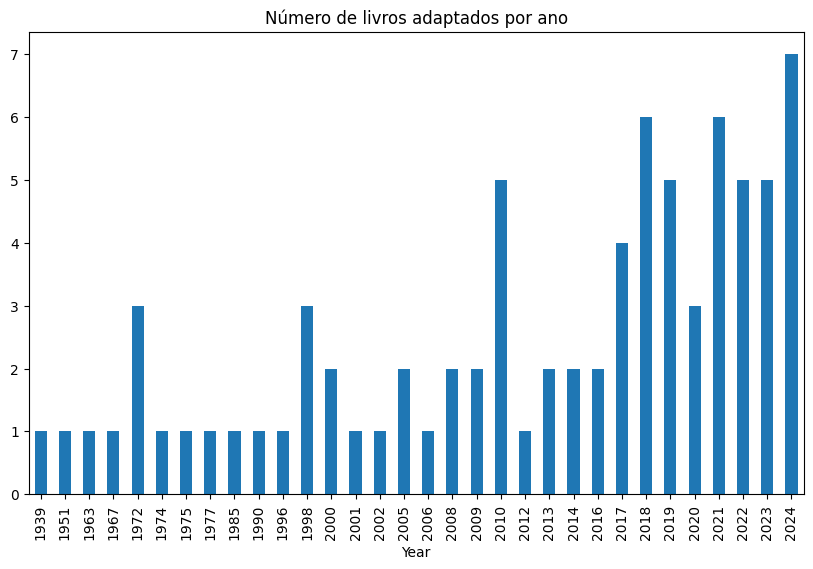

In [43]:
df_release = df_movies
df_release['release_date'] = pd.to_datetime(df_release['release_date'], errors='coerce')
df_release['release_year'] = df_release['release_date'].dt.year.astype('Int64')
movies_per_year = df_release.groupby('release_year').size()

plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Número de livros adaptados por ano')
plt.xlabel('Year')
plt.show()

de acordo com o gráfico acima, vemos uma tendência crescente de adaptações cinematrográficas de livros mais vendidos

## Operação de pivoteamento

In [55]:
df_pivot_movies = df_movies.pivot_table(
    index='original language',
    values='Popularity',
    aggfunc='mean'
)

df_pivot_movies.rename(index={'cs':'Czech', 'en':'English', 'es':'Spanish', 'fr':'French', 'hi':'Hindi', 'it':'Italian', 'ja':'Japanese', 'ko':'Korean', 'pl':'Polish', 'tl':'Tagalog', 'tr':'Turkish', 'zh':'Chinese'}, columns={'Popularity': 'Mean Popularity'}, inplace=True)

df_pivot_movies
#apenas verificando a popularidade média das adaptações de acordo com a língua original do filme
#conforme o imaginado, filmes em inglês são bem mais populares que o restante

,Mean Popularity
original language,
Czech,1.604000
English,54.681426
Spanish,5.649333
French,11.811000
Hindi,2.754000
Italian,6.337500
Japanese,2.035000
Korean,11.695000
Polish,42.642000


# NYT x TMDB

## Comparação entre as APIs

In [45]:
print(len(df_movies)) # número de livros na lista do NYT sem duplicidade
print(df_movies['Overview'].count()) # número de livros na lista do NYT que viraram adaptações cinematográficas

print('A relação de livros da lista de mais vendidos do NYT Times que viraram filmes é de ' + 
      str(round(df_movies['Overview'].count() / len(df_movies) * 100, 2)) + "%")

181
85
A relação de livros da lista de mais vendidos do NYT Times que viraram filmes é de 46.96%


In [46]:
max_vote = df_movies['vote_average'].max()
max_vote_movies = df_movies[df_movies['vote_average'] == max_vote]
titles_with_max_vote = max_vote_movies['title']
popularity_with_max_vote = max_vote_movies['Popularity']

print(f"A nota máxima que um livro adaptado recebeu foi {max_vote}.\n{int(titles_with_max_vote.count())} filmes tiveram essa nota. Foram eles: \n")
for title, popularity in zip(titles_with_max_vote, popularity_with_max_vote):
    print(f"{title}, cuja popularidade é de: {popularity}")

#a nota alta não necessariamente significa que o filme é bom
#como podemos ver abaixo, todos os filmes com nota 10 tem popularidade bem baixa
#sendo assim, é possível que a média de notas seja perfeita pq foi avaliada apenas por poucas pessoas
#que podem ser muito fãs do material original ou podem ter estado diretamente envolvidas com a produção

A nota máxima que um livro adaptado recebeu foi 10.0.
3 filmes tiveram essa nota. Foram eles: 

dumb warfare: nuclear war, cuja popularidade é de: 0.379
a samurai never tells a lie, cuja popularidade é de: 2.035
out of my mind, cuja popularidade é de: 2.76


In [47]:
min_vote = df_movies['vote_average'].min()
min_vote_movies = df_movies[df_movies['vote_average'] == min_vote]
titles_with_min_vote = min_vote_movies['title']
popularity_with_min_vote = min_vote_movies['Popularity']

print(f"A nota mínima que um livro adaptado recebeu foi {min_vote}.\n{int(titles_with_min_vote.count())} filmes tiveram essa nota. Foram eles: \n")
for title, popularity in zip(titles_with_min_vote, popularity_with_min_vote):
    print(f"{title}, cuja popularidade é de: {popularity}")

#da mesma forma que a nota alta, as notas baixas em geral também sofrem com baixa popularidade
#nesse caso, o efeito pode ter sido o oposto: adaptações rejeitadas pela base de fãs mais fiel
#não necessariamente indicando que o filme mereça zero, mas que talvez tenha sido pouco fiel ao trabalho original

A nota mínima que um livro adaptado recebeu foi 0.0.
23 filmes tiveram essa nota. Foram eles: 

republic: mustafa kemal pasha started to work on the use of the new alphabet and international numbers., cuja popularidade é de: 5.914
the goddess of mercy, cuja popularidade é de: 3.625
who rules over the destiny of china, cuja popularidade é de: 0.179
anxious generation, cuja popularidade é de: 0.325
remarkably bright creatures, cuja popularidade é de: 0.329
the wager, cuja popularidade é de: 12.617
educated, cuja popularidade é de: 0.321
born a crime, cuja popularidade é de: 2.723
three in the drift of the creative act, cuja popularidade é de: 0.19
loud, cuja popularidade é de: 0.036
the sun, the moon and the stars, cuja popularidade é de: 2.403
odder's ego trip, cuja popularidade é de: 0.009
dragons love tacos, cuja popularidade é de: 0.017
the pigeon has to go to school!, cuja popularidade é de: 0.575
the wild robot, cuja popularidade é de: 94.676
shadows of destiny - a gravity falls fa

In [48]:
avg_vote = df_movies['vote_average'].mean()
print('A média das adaptações é de ' + str(round(avg_vote, 2)))

A média das adaptações é de 4.7


## Últimas análises

In [49]:
df_movies['Popularity'].median()
df_filtrado_popularity = df_movies.loc[df_movies['Popularity'] > df_movies['Popularity'].median()]
df_filtrado_popularity.count()
#para tentar retirar os vieses informados acima,
#fizemos uma filtragem considerando apenas os filmes com popularidade acima da mediana. 
#Essa medida foi escolhida pois filmes muito populares distorcem a média da popularidade

title                42
original language    42
release_date         41
vote_average         42
Popularity           42
Overview             42
release_year         41
dtype: int64

In [50]:
max_vote = df_filtrado_popularity['vote_average'].max()
max_vote_movies = df_filtrado_popularity[df_filtrado_popularity['vote_average'] == max_vote]
titles_with_max_vote = max_vote_movies['title']
popularity_with_max_vote = max_vote_movies['Popularity']

print(f"A nota máxima que um livro adaptado recebeu foi {max_vote}.\n{int(titles_with_max_vote.count())} filme teve essa nota. Foi ele:\n")
for title, popularity in zip(titles_with_max_vote, popularity_with_max_vote):
    print(f"{title}, cuja popularidade é de: {popularity}")

#assim, entre os 50% filmes com mais popularidade, a lista de filmes que possui nota perfeita reduziu para 1

A nota máxima que um livro adaptado recebeu foi 8.382.
1 filme teve essa nota. Foi ele:

taylor swift | the eras tour, cuja popularidade é de: 68.976


In [51]:
min_vote = df_filtrado_popularity['vote_average'].min()
min_vote_movies = df_filtrado_popularity[df_filtrado_popularity['vote_average'] == min_vote]
titles_with_min_vote = min_vote_movies['title']
popularity_with_min_vote = min_vote_movies['Popularity']

print(f"A nota mínima que um livro adaptado recebeu foi {min_vote}.\n{int(titles_with_min_vote.count())} filmes tiveram essa nota. Foram eles: \n")
for title, popularity in zip(titles_with_min_vote, popularity_with_min_vote):
    print(f"{title}, cuja popularidade é de: {popularity}")

#já quanto aos 50% filmes mais populares, ainda há 4 com nota zerada
#nesse caso, é mais plausível de concluirmos que não houve distorção de notas, os filmes devem ser ruins mesmo

A nota mínima que um livro adaptado recebeu foi 0.0.
4 filmes tiveram essa nota. Foram eles: 

republic: mustafa kemal pasha started to work on the use of the new alphabet and international numbers., cuja popularidade é de: 5.914
the wager, cuja popularidade é de: 12.617
the wild robot, cuja popularidade é de: 94.676
shadows of destiny - a gravity falls fanfilm, cuja popularidade é de: 36.801
